In [44]:
from astropy.table import Table, vstack, unique, Column
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import numpy as np
import os
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib.patches import Circle, Rectangle
from astropy.visualization import ZScaleInterval, AsinhStretch, ImageNormalize, make_lupton_rgb

In [2]:
# Abre la tabla FITS
with fits.open('spectra_low_mass_properties.fits') as hdul:
    data = Table(hdul[1].data)  # Suponiendo que la tabla está en la extensión 1
# Acceder al primer valor dentro de los arrays de FLUX para los índices 1, 2 y 3
print("\nPrimer valor en los arrays de FLUX para los índices 1, 2, 3:")
print(data['FLUX'][1][0])  # Primer valor en el array del índice 1
print(data['FLUX'][2][0])  # Primer valor en el array del índice 2
print(data['FLUX'][3][0])  # Primer valor en el array del índice 3
# Acceder al primer valor dentro de los arrays de FLUX para los índices 1, 2 y 3
print("\nPrimer valor en los arrays de NAME para los índices 1, 2, 3:")
print(data['NAME'][1][0])  # Primer valor en el array del índice 1
print(data['NAME'][2][0])  # Primer valor en el array del índice 2
print(data['NAME'][3][0])  # Primer valor en el array del índice 3


Primer valor en los arrays de FLUX para los índices 1, 2, 3:
0.0
0.0
0.0

Primer valor en los arrays de NAME para los índices 1, 2, 3:
HeII
HeII
HeII


In [3]:
for i in range(28):
    print(f"NAME: {data['NAME'][0][i]}, LAMBDA: {data['LAMBDA'][0][i]}")

NAME: HeII, LAMBDA: 3203.14990234375
NAME: [NeV], LAMBDA: 3345.81005859375
NAME: [NeV], LAMBDA: 3425.81005859375
NAME: [OII], LAMBDA: 3726.030029296875
NAME: [OII], LAMBDA: 3728.72998046875
NAME: [NeIII], LAMBDA: 3868.68994140625
NAME: [NeIII], LAMBDA: 3967.39990234375
NAME: H5, LAMBDA: 3889.050048828125
NAME: He, LAMBDA: 3970.070068359375
NAME: Hd, LAMBDA: 4101.72998046875
NAME: Hg, LAMBDA: 4340.4599609375
NAME: [OIII], LAMBDA: 4363.14990234375
NAME: HeII, LAMBDA: 4685.740234375
NAME: [ArIV], LAMBDA: 4711.2998046875
NAME: [ArIV], LAMBDA: 4740.10009765625
NAME: Hb, LAMBDA: 4861.31982421875
NAME: [OIII], LAMBDA: 4958.830078125
NAME: [OIII], LAMBDA: 5006.77001953125
NAME: [NI], LAMBDA: 5197.89990234375
NAME: [NI], LAMBDA: 5200.39013671875
NAME: HeI, LAMBDA: 5875.60009765625
NAME: [OI], LAMBDA: 6300.2001953125
NAME: [OI], LAMBDA: 6363.669921875
NAME: [NII], LAMBDA: 6547.9599609375
NAME: Ha, LAMBDA: 6562.7998046875
NAME: [NII], LAMBDA: 6583.33984375
NAME: [SII], LAMBDA: 6716.31005859375
NA

In [4]:
met = []
met_2 = []
for i in range(len(data)):
    O3 = data['FLUX'][i][18] 
    N_ii = data['FLUX'][i][26]
    Ha = data['FLUX'][i][25]
    Hb = data['FLUX'][i][16]
    print(O3, N_ii, Ha, Hb)
    o3n2 = np.log10((O3/Hb)*(Ha/N_ii))
    N2 = np.log10(N_ii/Ha)
    met.append(8.533-0.214*o3n2)
    met_2.append(8.743+0.462*N2)
print(met)
print(met_2)

0.0 48.499977 82.42386 12.844088
0.0 38.383656 71.6432 4.919944
1.3975084 58.083828 117.59759 12.0932045
0.0 61.0557 41.130207 52.52126
8.147629 41.652573 22.352736 56.158836
0.0 58.59096 93.199646 20.688938
0.0 122.92326 211.14758 39.8402
0.0 294.12256 419.66754 150.48082
0.0 37.141308 18.57827 28.930346
0.0 217.00372 197.20058 393.03708
0.0 198.3408 181.71198 461.86185
0.0 63.456535 107.97674 16.2691
0.0 88.95515 65.86936 67.36025
0.95457494 154.91109 673.802 27.959898
0.0 69.183105 61.117367 46.561974
0.0 55.32859 29.985039 55.472195
0.0 92.26293 75.24823 98.38448
0.0 19.09337 44.81951 4.50215
7.5808005 152.81221 97.70246 119.11223
0.0 170.88503 540.75433 525.5508
7.6081543 170.05681 75.939445 577.47687
0.0 36.67015 14.582514 30.825287
0.0 256.14417 285.70587 237.60138
0.0 33.486393 22.931904 63.397316
12.934387 14.582608 6.936714 10.104236
9.748511 244.67233 152.68834 377.25684
4.7040286 82.98977 47.79625 100.0198
3.3704634 266.70627 184.64265 1252.9336
5.913862 16.058851 5.939298 

/tmp/ipykernel_4406/3204594618.py:9: RuntimeWarning: divide by zero encountered in log10
  o3n2 = np.log10((O3/Hb)*(Ha/N_ii))


In [5]:
# Crear una nueva columna a partir de tu lista
nueva_columna = Column(name='12 + log(O/H)', data=met)
nueva_columna_2 = Column(name='12 + log(O/H) (b)', data=met_2)

# Agregar la columna a la tabla
data.add_column(nueva_columna)
data.add_column(nueva_columna_2)
    
data_see = data['log(M_stellar)', 'ra', 'dec', 'Group', 'Gal', '12 + log(O/H) (b)' ]
data_see[data_see['log(M_stellar)'] < 8.5]

log(M_stellar),ra,dec,Group,Gal,12 + log(O/H) (b)
float64,float64,float64,int16,int16,float64
7.772830640581066,13.04660065707238,-1.128448197229796,20,3,8.63659613609314
7.9862205089680245,128.6624563525526,15.76384033243654,74,1,8.617784755527973
8.430544515619072,128.6843710942975,15.79049411645369,74,3,8.601469456374646
7.755469692828418,160.0979346994472,24.218117062578,90,1,8.634452147185803
8.210492452829067,167.5168502117463,-1.004677110111772,97,2,8.671677799135447
7.540785302068324,174.1685202200961,21.69989212707423,107,3,8.636345511823892
8.115294786455372,203.3246429798482,11.08851325656476,140,2,8.571789966583252
8.392658350110107,208.8599605956549,6.56629489961704,148,4,8.51186324954033
7.936244906288724,213.2258035175576,23.3377822835228,155,2,8.904758500337602


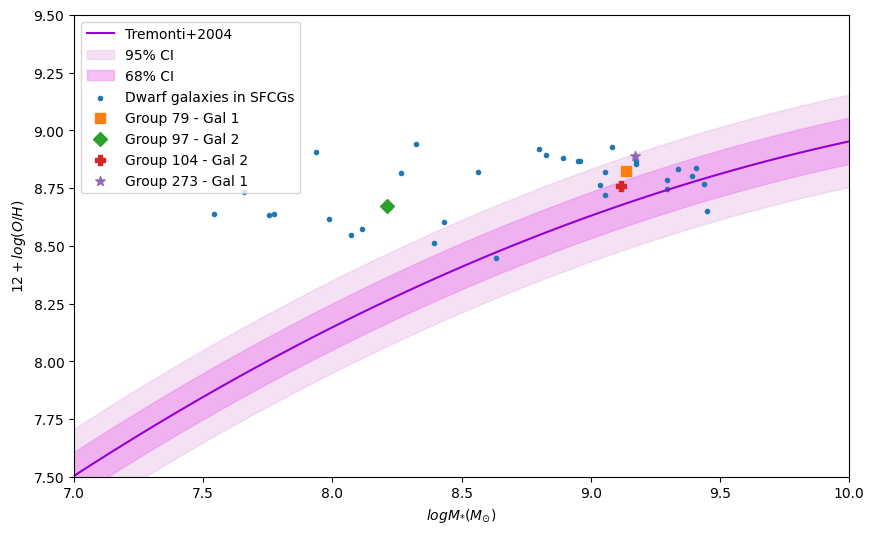

36

In [6]:
def fit(x):
    return -1.492 + 1.847*x - 0.08026*x**2

x_data = np.linspace(5.5, 11.5, 100)
y_fit = fit(x_data)

# Suponemos una dispersión estándar de 0.1 dex (ajustar según el paper)
sigma = 0.1
y_68_upper = y_fit + sigma  # Intervalo del 68%
y_68_lower = y_fit - sigma
y_95_upper = y_fit + 2 * sigma  # Intervalo del 95%
y_95_lower = y_fit - 2 * sigma

# Graficamos el ajuste y sus intervalos de confianza
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_fit, color='darkviolet', label='Tremonti+2004')

# Sombras para los intervalos de confianza
plt.fill_between(x_data, y_95_lower, y_95_upper, color='plum', alpha=0.3, label='95% CI')
plt.fill_between(x_data, y_68_lower, y_68_upper, color='violet', alpha=0.5, label='68% CI')

plt.scatter(data['log(M_stellar)'][data['12 + log(O/H) (b)'] != np.inf], data['12 + log(O/H) (b)'][data['12 + log(O/H) (b)'] != np.inf], marker='.', label='Dwarf galaxies in SFCGs')
plt.xlabel('$log M_{*}(M_{\odot})$')
plt.ylabel('$12 + log(O/H)$')

# Lista de galaxias a resaltar (log(M_stellar), 12 + log(O/H), marcador, etiqueta)
galaxias_destacadas = [
    (9.137470, 8.822263, 's', 'Group 79 - Gal 1'),
    (8.210492, 8.671677, 'D', 'Group 97 - Gal 2'),
    (9.118780, 8.760569, 'P', 'Group 104 - Gal 2'),
    (9.173247, 8.887234, '*', 'Group 273 - Gal 1')
]

# Graficar galaxias destacadas con diferentes marcadores
for x, y, marker, label in galaxias_destacadas:
    plt.scatter(x, y, marker=marker, s=50, label=label)

plt.ylim(7.5, 9.5)
plt.xlim(7, 10)
plt.legend(loc='upper left')
plt.show()
len(data['log(M_stellar)'][data['12 + log(O/H) (b)'] != np.inf])

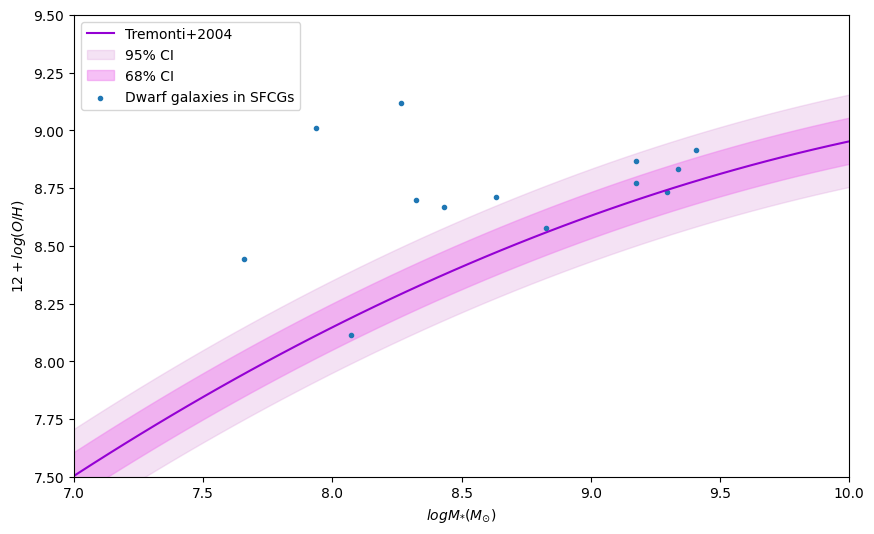

13

In [7]:
def fit(x):
    return -1.492 + 1.847*x - 0.08026*x**2

x_data = np.linspace(5.5, 11.5, 100)
y_fit = fit(x_data)

# Suponemos una dispersión estándar de 0.1 dex (ajustar según el paper)
sigma = 0.1
y_68_upper = y_fit + sigma  # Intervalo del 68%
y_68_lower = y_fit - sigma
y_95_upper = y_fit + 2 * sigma  # Intervalo del 95%
y_95_lower = y_fit - 2 * sigma

# Graficamos el ajuste y sus intervalos de confianza
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_fit, color='darkviolet', label='Tremonti+2004')

# Sombras para los intervalos de confianza
plt.fill_between(x_data, y_95_lower, y_95_upper, color='plum', alpha=0.3, label='95% CI')
plt.fill_between(x_data, y_68_lower, y_68_upper, color='violet', alpha=0.5, label='68% CI')

plt.scatter(data['log(M_stellar)'][data['12 + log(O/H)'] != np.inf], data['12 + log(O/H)'][data['12 + log(O/H)'] != np.inf], marker='.', label='Dwarf galaxies in SFCGs')
plt.xlabel('$log M_{*}(M_{\odot})$')
plt.ylabel('$12 + log(O/H)$')

plt.ylim(7.5, 9.5)
plt.xlim(7, 10)
plt.legend(loc='upper left')
plt.show()
len(data['log(M_stellar)'][data['12 + log(O/H)'] != np.inf])

In [8]:
H_0 = 67.4 #km/s/Mpc
c = 300000

data['Distance (Mpc)'] = (data['zmemb']*c)/H_0
data['M_i'] = data['m_i_corrected'] - 5*np.log10(data['Distance (Mpc)']*1000000) + 5 + 1.592*data['ebv']
data['stellar_mass_phot_i'] = (1.15 + 0.7*(data['m_g_corrected'] - data['m_i_corrected']) - 0.4*data['M_i'])

data['RE_r(kpc)'] = (data['RE_r']*0.262*data['Distance (Mpc)'])/206.265
data['e_RE_r(kpc)'] = (data['e_RE_r']*0.262*data['Distance (Mpc)'])/206.265

In [9]:
data

log(M_stellar),ra,dec,zmemb,PLATE,MJD,FIBERID,RA,DEC,Z,Z_ERR,ZNUM,VEL_STARS,REDSHIFT,SIGMA_STARS,SIGMA_STARS_ERR,CHISQ,FILENAME,BPT,NAME,LAMBDA,KIND,A,V,V_ERR,SIG,SIG_ERR,AMPLITUDE,AMPLITUDE_ERR,FLUX,FLUX_ERR,EW,EW_ERR,FLUX_CONT,FLUX_CONT_ERR,AON,EBMV,EBMV_ERR,EBMV_SFD,FIT_WARNING,ERROR_WARNING,LEGACY_TARGET1,LEGACY_TARGET2,SPECIAL_TARGET1,SPECIAL_TARGET2,BOSS_TARGET1,BOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,SPECPRIMARY,SPECOBJID,Group,Gal,logSFR_NUV,logSFR_FUV,RE_g,n_g,RE_r,n_r,RE_i,n_i,RE_z,n_z,e_RE_g,e_n_g,e_RE_r,e_n_r,e_RE_i,e_n_i,e_RE_z,e_n_z,m_g_corrected,m_r_corrected,m_i_corrected,m_z_corrected,ebv,12 + log(O/H),12 + log(O/H) (b),Distance (Mpc),M_i,stellar_mass_phot_i,RE_r(kpc),e_RE_r(kpc)
float64,float64,float64,float64,int32,int32,int32,float64,float64,float32,float32,int32,float32,float32,float32,float32,float32,str30,str13,str7[28],float32[28],str3[28],float32[28],float32[28],float32[28],float32[28],float32[28],float32[28],float32[28],float32[28],float32[28],float32[28],float32[28],float32[28],float32[28],float32[28],float32,float32,float32,int16[28],int32,int32,int32,int64,int64,int64,int64,int64,int64,uint8,str22,int16,int16,float64,float64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
7.772830640581066,13.04660065707238,-1.128448197229796,0.104819,394,51812,128,13.045936,-1.1293047,0.10479305,7.582706e-06,1,29925.217,0.10497176,57.6708,19.925512,0.97096354,emlinekin-0394-51812-0128.fits,Star Forming,HeII .. [SII],3203.15 .. 6730.68,l .. l,1.0 .. 1.0,29925.217 .. 29966.56,-0.0 .. 10.107811,10.0 .. 42.681717,-0.0 .. 18.63259,0.0 .. 7.321438,-0.0 .. 0.5315187,0.0 .. 34.086617,0.0 .. 5.7318726,0.0 .. 3.9874082,nan .. 0.67156243,0.0 .. 6.452994,0.0 .. 0.015923684,0.0 .. 4.428616,0.09479862,0.011441072,0.05147986,0 .. 0,0,64,0,0,0,0,0,0,0,0,443639778068424704,20,3,0.900993960541749,0.6696930378611601,13.8501,1.2425,12.7863,1.3475,11.7714,1.4478,10.6727,1.5562,0.0278,0.0039,0.0145,0.002,0.017,0.0029,0.0325,0.0053,21.26651273028608,21.247245959393073,20.894139593924283,21.389783909920663,0.051507268,inf,8.63659613609314,466.55341246290794,-17.368367686872382,8.358008270202212,7.577431349074803,0.008593006152020884
7.9862205089680245,128.6624563525526,15.76384033243654,0.106065,2276,53712,94,128.66204,15.762943,0.10599749,9.185569e-06,1,30295.12,0.10633598,63.85318,15.270122,0.9318393,emlinekin-2276-53712-0094.fits,Star Forming,HeII .. [SII],3203.15 .. 6730.68,l .. l,1.0 .. 1.0,30295.12 .. 30289.947,-0.0 .. 16.67095,10.0 .. 61.99127,-0.0 .. 22.19779,0.0 .. 3.9729035,-0.0 .. 0.41491294,0.0 .. 21.599339,0.0 .. 4.9596663,0.0 .. 2.4309597,nan .. 0.5587871,0.0 .. 6.304284,0.0 .. 0.017898167,0.0 .. 2.7043192,0.11567445,0.016539726,0.036811687,0 .. 0,0,64,0,0,0,0,0,0,0,1,2562574088774117376,74,1,0.4221512890472283,0.6569438114500592,10.8291,0.9878,10.7234,1.1214,10.6225,1.2488,10.5134,1.3868,0.0412,0.0066,0.0262,0.004,0.0383,0.0062,0.065,0.0108,21.6010975355602,21.35371514282164,21.066282591269324,21.44936012046131,0.036841176,inf,8.617784755527973,472.09940652818995,-17.24523352895873,8.422463872587105,6.430455110186754,0.01571124120026232
8.430544515619072,128.6843710942975,15.79049411645369,0.10596,2276,53712,189,128.68383,15.790994,0.10593146,7.740058e-06,1,30263.098,0.10621782,68.251434,11.904828,0.95008165,emlinekin-2276-53712-0189.fits,Star Forming,HeII .. [SII],3203.15 .. 6730.68,l .. l,1.0 .. 1.0,30263.098 .. 30263.098,-0.0 .. 6.595423,10.0 .. 10.0,-0.0 .. 14.15442,0.0 .. 11.347637,-0.0 .. 0.8411631,0.0 .. 44.016552,0.0 .. 4.1881514,0.0 .. 2.786167,nan .. 0.27029058,0.0 .. 13.620479,0.0 .. 0.033450976,0.0 .. 7.646227,0.05,0.010877682,0.037374504,0 .. 0,0,64,0,0,0,0,0,0,0,1,2562600202175277056,74,3,1.193902920547469,1.2428467861748391,7.5859,1.5324,7.4107,1.6237,7.2434,1.7107,7.0624,1.805,0.0179,0.0066,0.0111,0.004,0.0151,0.0055,0.0258,0

In [95]:
data_properties = data['Group', 'Gal', 'ra', 'dec', 'zmemb', 'log(M_stellar)', '12 + log(O/H) (b)', 'logSFR_NUV', 'n_r', 'e_n_r', 'RE_r', 'e_RE_r', 'Distance (Mpc)', 'RE_r(kpc)', 'e_RE_r(kpc)']
data_highz_dwarfs = data_properties[data_properties['log(M_stellar)']<9]
print(len(data_highz_dwarfs))

20


In [89]:
# To mark every dwarf galaxy over SFCG detection images
def mark_dwarfs(ra_list, dec_list, group, gal):
    """
    Muestra una imagen FITS y marca múltiples galaxias en ella.

    Parámetros:
    - ra_list: Lista de RAs de las galaxias
    - dec_list: Lista de Decs de las galaxias
    - group: Número del grupo (para cargar el archivo FITS correspondiente)
    - gal_list: Lista con etiquetas para las galaxias
    """

    # Ruta del archivo FITS
    route = "/home/seba/Documents/MorphoLS/Field_Img/det/"

    fits_file = f"det_group_{group}.fits"
    fits_g = f'/home/seba/Documents/DECALS/joined_bricks/{group}/{group}_image_g.fits'
    fits_r = f'/home/seba/Documents/DECALS/joined_bricks/{group}/{group}_image_r.fits'
    fits_z = f'/home/seba/Documents/DECALS/joined_bricks/{group}/{group}_image_z.fits'
    
    #Imágenes fits por filtro
    
    hdul_g = fits.open(fits_g)
    hdul_r = fits.open(fits_r)
    hdul_z = fits.open(fits_z)
    
    data_g = hdul_g[0].data
    data_r = hdul_r[0].data
    data_z = hdul_z[0].data

    pix_scale = 0.262

    # Cargar imagen FITS
    fits_path = os.path.join(route, fits_file)
    hdul = fits.open(fits_path)
    data = hdul[0].data
    wcs = WCS(hdul[0].header)
    hdul.close()

    # Convertir coordenadas de las galaxias a píxeles
    coords = SkyCoord(ra_list, dec_list, unit="deg")
    x_obj, y_obj = wcs.world_to_pixel(coords)

    # Convertir tamaños angulares a píxeles
    circle_radius = 10 / pix_scale  # Radio del círculo (10 arcsec)
    bar_length = 30 / pix_scale  # Longitud de la barra (30 arcsec)

    # Crear la figura
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": wcs})
    
    rgb_image = make_lupton_rgb(data_r, data_g, data_g, stretch=0.025, Q=8)
    ax.imshow(rgb_image, origin="lower")

    # Dibujar círculos y etiquetas para cada galaxia
    for i in range(len(ra_list)):
        circle_mark = Circle((x_obj[i], y_obj[i]), circle_radius, edgecolor="green", facecolor="none", linewidth=2, linestyle="--")
        ax.add_patch(circle_mark)

        # Añadir etiquetas a las galaxias
        ax.text(x_obj[i] + 30, y_obj[i] + 30, f"Gal {gal[i]}", color="cyan", fontsize=10, ha="left", va="bottom", bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))

    # Dibujar la barra de escala
    x_bar = 50
    y_bar = 50
    bar = Rectangle((x_bar, y_bar), bar_length, 5, edgecolor="magenta", facecolor="red")
    ax.add_patch(bar)

    # Añadir texto sobre la barra de escala
    ax.text(x_bar + bar_length / 2, y_bar + 10, "30 arcsec", color="magenta", fontsize=12, ha="center", va="bottom", bbox=dict(facecolor="black", alpha=0.5, edgecolor="none"))

        # Añadir texto sobre la barra de escala
    ax.text(1250, 50, f"Group {group}", color="magenta", fontsize=12, ha="center", va="bottom", bbox=dict(facecolor="black", alpha=0.5, edgecolor="none"))
    # Etiquetas
    ax.set_xlabel("RA")
    ax.set_ylabel("DEC")

    # Mostrar la imagen
    plt.show()

In [93]:
data_highz_dwarfs

Group,Gal,ra,dec,zmemb,log(M_stellar),12 + log(O/H) (b),logSFR_NUV,n_r,e_n_r,RE_r,e_RE_r,Distance (Mpc),RE_r(kpc),e_RE_r(kpc)
int16,int16,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64
20,3,13.04660065707238,-1.128448197229796,0.104819,7.772830640581066,8.63659613609314,0.900993960541749,1.3475,0.002,12.7863,0.0145,466.55341246290794,7.577431349074803,0.008593006152020884
74,1,128.6624563525526,15.76384033243654,0.106065,7.9862205089680245,8.617784755527973,0.4221512890472283,1.1214,0.004,10.7234,0.0262,472.09940652818995,6.430455110186754,0.01571124120026232
74,3,128.6843710942975,15.79049411645369,0.10596,8.430544515619072,8.601469456374646,1.193902920547469,1.6237,0.004,7.4107,0.0111,471.6320474777448,4.439543242584786,0.006649699757471104
90,1,160.0979346994472,24.218117062578,0.111183,7.755469692828418,8.634452147185803,0.7040552281421366,0.7577,0.0025,5.3369,0.0045,494.87982195845694,3.3547839910515274,0.0028287072944465654
97,2,167.5168502117463,-1.004677110111772,0.109852,8.210492452829067,8.671677799135447,1.4231782167041853,1.406,0.0049,4.8736,0.0071,488.9554896142433,3.0268782887848236,0.004409642943690959
98,4,168.0198611603887,29.40156252050033,0.033857,8.893872163420314,8.88199359679222,-0.08665926211399366,1.0606,0.0024,13.7931,0.0218,150.6988130563798,2.6402646846164086,0.004172939377271078
107,3,174.1685202200961,21.69989212707423,0.063183,7.540785302068324,8.636345511823892,0.32240660548551325,1.1562,0.0051,13.6764,0.044,281.2299703264095,4.8855014391054805,0.015717737366605335
122,4,190.3524647842002,18.31344056490991,0.070976,8.633865356634777,8.448036197900773,0.6645859501067086,1.0054,0.0007,15.6319,0.0072,315.9169139465875,6.27278491777992,0.0028892234090555488
132,4,198.2811769270057,12.68375142899898,0.030082,8.94975323021382,8.865912791907787,-0.21366674517611628,1.0974,0.0023,14.3465,0.0202,133.89614243323442,2.439999728231257,0.003435541387116815


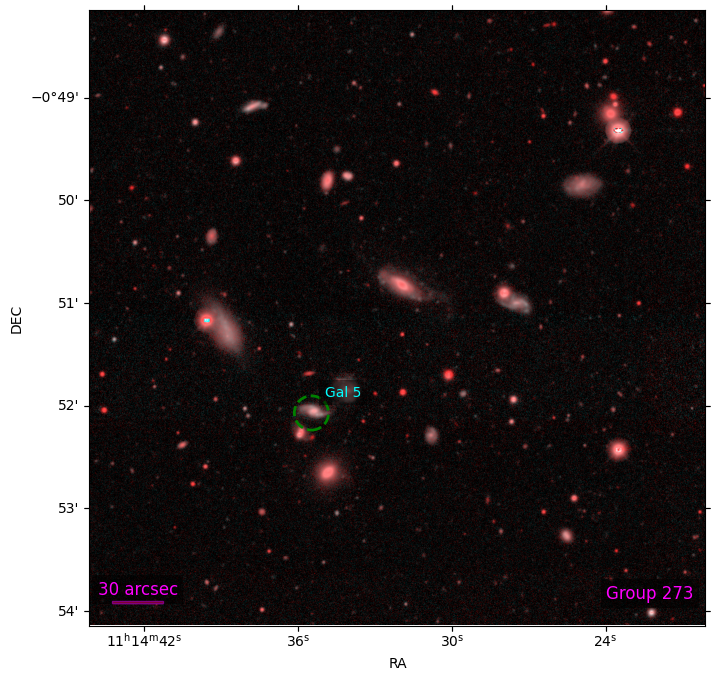

In [91]:
# Agrupar galaxias por el campo 'Group'
dwarfs_groups = data_highz_dwarfs.group_by('Group')

# Lista de grupos únicos
groups = np.unique(data_highz_dwarfs['Group'])  

# Iterar sobre cada grupo
for g in groups:
    if g==273:
        # Filtrar galaxias que pertenecen al grupo actual
        mask = data_highz_dwarfs['Group'] == g  
        ra_group = data_highz_dwarfs['ra'][mask]  # RA de las galaxias en el grupo
        dec_group = data_highz_dwarfs['dec'][mask]  # DEC de las galaxias en el grupo
        gals = data_highz_dwarfs['Gal'][mask]
        # Generar etiquetas para cada galaxia (opcional)
        #labels = [f"Gal {i+1}" for i in range(len(ra_group))]

        # Llamar a la función para marcar galaxias en la imagen del grupo
        mark_dwarfs(ra_group, dec_group, g, gals)
